Veremos inserção de dados, remoção de colunas, merge e gráficos
Autor: Henrique Poyatos e galera

In [1]:
#Importando biblioteca pandas no Python
import pandas as pd

ca_df = pd.read_excel("ca-2021-02.xlsx")
display (ca_df.head())

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0004-65,RODOVIA AL 220,105,KM 68,CANAFISTULA,57302-605,GASOLINA,2021-11-01,6.799,NaN,R$ / litro,VIBRA ENERGIA
1,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0004-65,RODOVIA AL 220,105,KM 68,CANAFISTULA,57302-605,ETANOL,2021-11-01,5.299,NaN,R$ / litro,VIBRA ENERGIA
2,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0004-65,RODOVIA AL 220,105,KM 68,CANAFISTULA,57302-605,DIESEL,2021-11-01,5.549,NaN,R$ / litro,VIBRA ENERGIA
3,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0004-65,RODOVIA AL 220,105,KM 68,CANAFISTULA,57302-605,GASOLINA ADITIVADA,2021-11-01,6.899,NaN,R$ / litro,VIBRA ENERGIA
4,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0004-65,RODOVIA AL 220,105,KM 68,CANAFISTULA,57302-605,DIESEL S10,2021-11-01,5.649,NaN,R$ / litro,VIBRA ENERGIA


In [2]:
#Inserção simples de dado (recapitulação)
ca_df['Ativo'] = True
display(ca_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168409 entries, 0 to 168408
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Regiao - Sigla     168409 non-null  object        
 1   Estado - Sigla     168409 non-null  object        
 2   Municipio          168409 non-null  object        
 3   Revenda            168409 non-null  object        
 4   CNPJ da Revenda    168409 non-null  object        
 5   Nome da Rua        168409 non-null  object        
 6   Numero Rua         168353 non-null  object        
 7   Complemento        35057 non-null   object        
 8   Bairro             168043 non-null  object        
 9   Cep                168409 non-null  object        
 10  Produto            168409 non-null  object        
 11  Data da Coleta     168409 non-null  datetime64[ns]
 12  Valor de Venda     168409 non-null  float64       
 13  Valor de Compra    0 non-null       float64 

None

In [3]:
#Criando um coluna com condição especifica
ca_df['Obs'] = ["Melhor Cidade" if municipio == 'OSASCO' else 'Você Não' for municipio in ca_df['Municipio']]
display(ca_df.loc[ca_df['Municipio'].isin(['OSASCO','INDAIATUBA', 'CAMPINAS']), ['Municipio', 'Obs']])

,Municipio,Obs
2607,CAMPINAS,Você Não
2608,CAMPINAS,Você Não
2609,CAMPINAS,Você Não
2610,CAMPINAS,Você Não
2611,CAMPINAS,Você Não
...,...,...
162059,OSASCO,Melhor Cidade
162060,OSASCO,Melhor Cidade
162061,OSASCO,Melhor Cidade
162062,OSASCO,Melhor Cidade


In [4]:
#Estimando se o produto é caro ou barato de acordo com o valor médio dos combustiveis totais obtido anteriormente
#Valor médio dos combustiveis é de 6 reais aproximadamente
import numpy as np

ca_df['Media'] = np.where(ca_df['Valor de Venda'] > 6.00, 'Acima', 'Abaixo')
display(ca_df[['Revenda', 'Valor de Venda', 'Media']])

,Revenda,Valor de Venda,Media
0,POSTO ARAPIRACA LTDA,6.799,Acima
1,POSTO ARAPIRACA LTDA,5.299,Abaixo
2,POSTO ARAPIRACA LTDA,5.549,Abaixo
3,POSTO ARAPIRACA LTDA,6.899,Acima
4,POSTO ARAPIRACA LTDA,5.649,Abaixo
...,...,...,...
168404,COMERCIAL DE COMBUSTIVEL CACHOEIRINHA LTDA,5.859,Abaixo
168405,ABC DISTRIBUICAO DE PETROLEO LTDA,6.580,Acima
168406,ABC DISTRIBUICAO DE PETROLEO LTDA,4.740,Abaixo
168407,ABC DISTRIBUICAO DE PETROLEO LTDA,5.448,Abaixo


In [5]:
#Calcular revendedores por habitantes (é, eles não estão na tabela) na amostragem
habit_df = pd.read_csv("ibge_num_habitantes_estimado.csv", sep=";")
#Renomeando uma coluna no dataframe
habit_df.rename(columns={"Estado":"Estado - Sigla"}, inplace=True)
display(habit_df)

,Municipio,Estado - Sigla,NumHabitantes2021
0,BELO HORIZONTE,MG,2530701
1,CAMPINAS,SP,1223237
2,CAMPO GRANDE,MS,916001
3,CURITIBA,PR,1963726
4,GOIANIA,GO,1555626
5,INDAIATUBA,SP,260690
6,NATAL,RN,803739
7,PALMAS,TO,313349
8,PENAPOLIS,SP,64098
9,PORTO ALEGRE,RS,1492530


In [6]:
#Fazer uma "junção - merge" dos dois dataframes
colunas =['Municipio', 'Estado - Sigla']
merge_df = ca_df.merge(habit_df, how="inner", on=colunas)
#how="inner" elimina não correspondentes
display(merge_df)
print(merge_df.info())

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira,Ativo,Obs,Media,NumHabitantes2021
0,CO,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,AVENIDA VEREADOR JOSE MONTEIRO,1854,QUADRA08 LOTE 11E,SETOR NEGRAO DE LIMA,74650-300,GASOLINA,2021-11-01,6.999,NaN,R$ / litro,RAIZEN,True,Você Não,Acima,1555626
1,CO,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,AVENIDA VEREADOR JOSE MONTEIRO,1854,QUADRA08 LOTE 11E,SETOR NEGRAO DE LIMA,74650-300,ETANOL,2021-11-01,4.990,NaN,R$ / litro,RAIZEN,True,Você Não,Abaixo,1555626
2,CO,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,AVENIDA VEREADOR JOSE MONTEIRO,1854,QUADRA08 LOTE 11E,SETOR NEGRAO DE LIMA,74650-300,GASOLINA ADITIVADA,2021-11-01,7.130,NaN,R$ / litro,RAIZEN,True,Você Não,Acima,1555626
3,CO,GO,GOIANIA,POSTO DO BOI LTDA,06.880.293/0001-25,AVENIDA INDEPENDENCIA,2.908,NaN,VILA NOVA,74645-010,GASOLINA,2021-11-01,6.990,NaN,R$ / litro,BRANCA,True,Você Não,Acima,1555626
4,CO,GO,GOIANIA,POSTO DO BOI LTDA,06.880.293/0001-25,AVENIDA INDEPENDENCIA,2.908,NaN,VILA NOVA,74645-010,ETANOL,2021-11-01,4.990,NaN,R$ / litro,BRANCA,True,Você Não,Abaixo,1555626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21381,SE,SP,OSASCO,NOVA GRANADA LTDA.,28.075.798/0001-50,AVENIDA VISCONDE DE NOVA GRANADA,2163,NaN,CIPAVA,06075-130,DIESEL S10,2021-12-28,4.999,NaN,R$ / litro,BRANCA,True,Melhor Cidade,Abaixo,701428
21382,SE,SP,OSASCO,NOVA GRANADA LTDA.,28.075.798/0001-50,AVENIDA VISCONDE DE NOVA GRANADA,2163,NaN,CIPAVA,06075-130,GASOLINA ADITIVADA,2021-12-28,5.999,NaN,R$ / litro,BRANCA,True,Melhor Cidade,Abaixo,701428
21383,SE,SP,OSASCO,NOVA GRANADA LTDA.,28.075.798/0001-50,AVENIDA VISCONDE DE NOVA GRANADA,2163,NaN,CIPAVA,06075-130,DIESEL,2021-12-28,4.977,NaN,R$ / litro,BRANCA,True,Melhor Cidade,Abaixo,701428
21384,SE,SP,OSASCO,NOVA GRANADA LTDA.,28.075.798/0001-50,AVENIDA VISCONDE DE NOVA GRANADA,2163,NaN,CIPAVA,06075-130,ETANOL,2021-12-28,4.699,NaN,R$ / litro,BRANCA,True,Melhor Cidade,Abaixo,701428


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21386 entries, 0 to 21385
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Regiao - Sigla     21386 non-null  object        
 1   Estado - Sigla     21386 non-null  object        
 2   Municipio          21386 non-null  object        
 3   Revenda            21386 non-null  object        
 4   CNPJ da Revenda    21386 non-null  object        
 5   Nome da Rua        21386 non-null  object        
 6   Numero Rua         21386 non-null  object        
 7   Complemento        3937 non-null   object        
 8   Bairro             21386 non-null  object        
 9   Cep                21386 non-null  object        
 10  Produto            21386 non-null  object        
 11  Data da Coleta     21386 non-null  datetime64[ns]
 12  Valor de Venda     21386 non-null  float64       
 13  Valor de Compra    0 non-null      float64       
 14  Unidad

In [7]:
#Eliminar colunas com todas informações nulas (axis=0-linha, axis=1-coluna)
merge_df.dropna(axis=1, inplace=True)
print(merge_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21386 entries, 0 to 21385
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Regiao - Sigla     21386 non-null  object        
 1   Estado - Sigla     21386 non-null  object        
 2   Municipio          21386 non-null  object        
 3   Revenda            21386 non-null  object        
 4   CNPJ da Revenda    21386 non-null  object        
 5   Nome da Rua        21386 non-null  object        
 6   Numero Rua         21386 non-null  object        
 7   Bairro             21386 non-null  object        
 8   Cep                21386 non-null  object        
 9   Produto            21386 non-null  object        
 10  Data da Coleta     21386 non-null  datetime64[ns]
 11  Valor de Venda     21386 non-null  float64       
 12  Unidade de Medida  21386 non-null  object        
 13  Bandeira           21386 non-null  object        
 14  Ativo 

In [8]:
#Exercitando o drop
colunas=['Regiao - Sigla', 'Nome da Rua', 'Numero Rua', 'Bairro',
        'Cep', 'Data da Coleta', 'Unidade de Medida', 'Bandeira',
        'Ativo', 'Obs', 'Media', 'Valor de Venda', 'Produto']
merge_df.drop(labels=colunas, axis=1, inplace=True)
print(merge_df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21386 entries, 0 to 21385
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Estado - Sigla     21386 non-null  object
 1   Municipio          21386 non-null  object
 2   Revenda            21386 non-null  object
 3   CNPJ da Revenda    21386 non-null  object
 4   NumHabitantes2021  21386 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1002.5+ KB
None


In [9]:
display(merge_df.head(100))

,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,NumHabitantes2021
0,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,1555626
1,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,1555626
2,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,1555626
3,GO,GOIANIA,POSTO DO BOI LTDA,06.880.293/0001-25,1555626
4,GO,GOIANIA,POSTO DO BOI LTDA,06.880.293/0001-25,1555626
...,...,...,...,...,...
95,GO,GOIANIA,AUTO POSTO DONA SANTA LTDA.,08.232.672/0001-34,1555626
96,GO,GOIANIA,AUTO POSTO DONA SANTA LTDA.,08.232.672/0001-34,1555626
97,GO,GOIANIA,AUTO POSTO ANTENA 104 EIRELI,05.634.368/0001-25,1555626
98,GO,GOIANIA,AUTO POSTO ANTENA 104 EIRELI,05.634.368/0001-25,1555626


In [10]:
#Removendo linhas "duplicadas"
merge_df.drop_duplicates(inplace=True)
display(merge_df.head(100))

,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,NumHabitantes2021
0,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,1555626
3,GO,GOIANIA,POSTO DO BOI LTDA,06.880.293/0001-25,1555626
7,GO,GOIANIA,POSTO DN LTDA,05.413.136/0001-47,1555626
11,GO,GOIANIA,POSTO ALDEIA LTDA,04.896.662/0001-42,1555626
15,GO,GOIANIA,AUTO POSTO SANTA LUZIA LTDA,04.142.631/0001-04,1555626
...,...,...,...,...,...
1677,RJ,RIO DE JANEIRO,POSTO SANTA CLARA DA PAVUNA II LTDA,06.955.648/0001-06,6775561
1682,RJ,RIO DE JANEIRO,POSTO SANTA CLARA DA PAVUNA LTDA,03.246.347/0001-07,6775561
1688,RJ,RIO DE JANEIRO,NOVA PARADINHA AUTO POSTO LTDA,07.594.094/0001-13,6775561
1694,RJ,RIO DE JANEIRO,AUTO POSTO LUAR DA PENHA LTDA.,07.035.006/0001-43,6775561


In [14]:
#Agrupra e somar quantos postos tem na cidade desejada
postos_mp_df = merge_df.groupby(by=['Estado - Sigla', 'Municipio', 'NumHabitantes2021']).count()
postos_mp_df.drop('CNPJ da Revenda', axis=1, inplace=True)
postos_mp_df.reset_index(inplace=True)
postos_mp_df.rename(columns={'Revenda': 'Numero de Postos'}, inplace=True)
display(postos_mp_df)


,Estado - Sigla,Municipio,NumHabitantes2021,Numero de Postos
0,AC,RIO BRANCO,419452,44
1,GO,GOIANIA,1555626,93
2,MG,BELO HORIZONTE,2530701,54
3,MS,CAMPO GRANDE,916001,104
4,PR,CURITIBA,1963726,110
5,RJ,RIO DE JANEIRO,6775561,379
6,RN,NATAL,803739,37
7,RO,PORTO VELHO,548952,40
8,RS,PORTO ALEGRE,1492530,73
9,SP,CAMPINAS,1223237,51


In [15]:
postos_mp_df['Habitantes por Postos'] = postos_mp_df['NumHabitantes2021'] / postos_mp_df['Numero de Postos']
display(postos_mp_df)

,Estado - Sigla,Municipio,NumHabitantes2021,Numero de Postos,Habitantes por Postos
0,AC,RIO BRANCO,419452,44,9533.000000
1,GO,GOIANIA,1555626,93,16727.161290
2,MG,BELO HORIZONTE,2530701,54,46864.833333
3,MS,CAMPO GRANDE,916001,104,8807.701923
4,PR,CURITIBA,1963726,110,17852.054545
5,RJ,RIO DE JANEIRO,6775561,379,17877.469657
6,RN,NATAL,803739,37,21722.675676
7,RO,PORTO VELHO,548952,40,13723.800000
8,RS,PORTO ALEGRE,1492530,73,20445.616438
9,SP,CAMPINAS,1223237,51,23985.039216


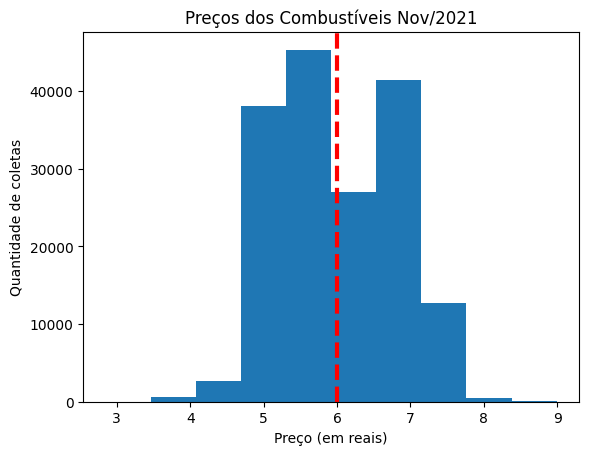

In [34]:
#Fazendo gráficos
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(ca_df['Valor de Venda'])
#Titulo para o grafico
plt.title("Preços dos Combustíveis Nov/2021")
#Rótulo horizontal e vertical
plt.xlabel("Preço (em reais)")
plt.ylabel("Quantidade de coletas")
#Linha tracejada vermelha com o preço médio (cor pode ser manipulada)
plt.axvline(ca_df['Valor de Venda'].mean(), color='red', linestyle='--', linewidth='3')
plt.show()

In [35]:
#Visualizando o consumo médio
c_media = ca_df['Valor de Venda'].groupby(by=ca_df['Produto']).mean()
display(c_media)

Produto
DIESEL                5.375682
DIESEL S10            5.454901
ETANOL                5.456115
GASOLINA              6.708741
GASOLINA ADITIVADA    6.860422
GNV                   4.392935
Name: Valor de Venda, dtype: float64

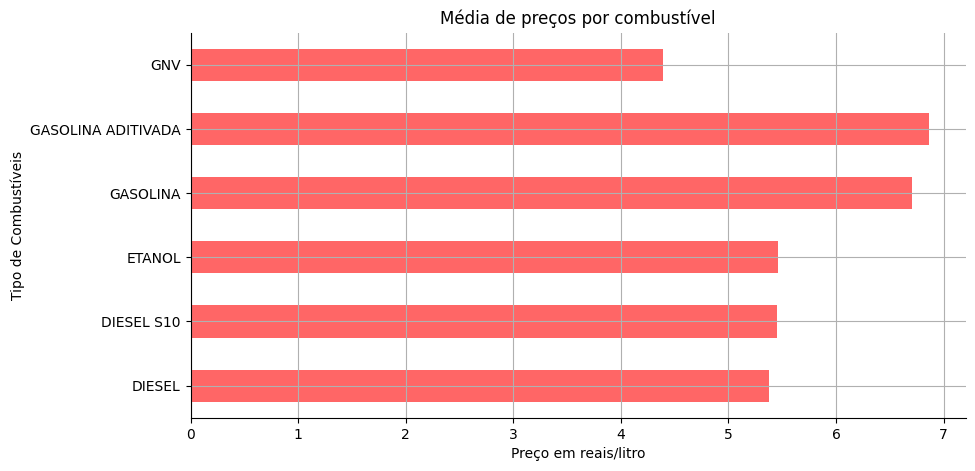

In [38]:
#Definindo tamanho do gráfico
plt.figure(figsize=(10,5))
#Plotando o gráfico
c_media.plot(
    kind="barh",
    xlabel="Preço em reais/litro",
    ylabel="Tipo de Combustíveis",
    title="Média de preços por combustível",
    color="red",
    alpha=0.6
)
#Grid
sns.despine()
plt.grid()
plt.show()

In [48]:
#Personalização de planilha Excel
from openpyxl import load_workbook
from openpyxl.styles import PatternFill, Font, Color, Alignment
#c_media.to_excel("por_litro.xlsx", "Sumário")
excel = 'por_litro.xlsx'
#Abrir o Excel no openpyxl
wb = load_workbook(excel)
#Pegar a planilha "certa" com sheet name
ws = wb['Sumário']

#Cabeçalho colorido
cinzinha = PatternFill("solid", fgColor="CCCCCC")
coords = ['A1', 'B1']
for coord in coords:
    ws[coord].fill = cinzinha

#Onde o preço for igual ou acima de 6.5 será pintado de vermelho e em negrito
MAX_ROW = ws.max_row
num_linha = 2
while (num_linha <= MAX_ROW):
    coord = 'B'+str(num_linha)
    if ws[coord].value >= 6.5:
        ws[coord].font = Font(bold=True, color='FF0000')
    elif ws[coord].value < 6.5:
        ws[coord].font = Font(color='00FF00')
    num_linha = num_linha + 1

#Salvar o Excel
wb.save(excel)